In [26]:
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00467/Sapfile1.arff'
r = requests.get(url, allow_redirects=True)
open('Sapfile1.arff', 'wb').write(r.content)

from scipy.io import arff
import pandas as pd

data = arff.loadarff('Sapfile1.arff')

In [27]:
data # displays the entire data
df.describe()

,fs,nf,tt
count,131.000000,131.000000,131.000000
mean,1.335878,2.213740,1.480916
std,0.505519,0.794284,0.636712
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,1.000000,2.000000,1.000000
75%,2.000000,3.000000,2.000000
max,3.000000,3.000000,3.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
ge     131 non-null object
cst    131 non-null object
tnp    131 non-null object
twp    131 non-null object
iap    131 non-null object
esp    131 non-null object
arr    131 non-null object
ms     131 non-null object
ls     131 non-null object
as     131 non-null object
fmi    131 non-null object
fs     131 non-null object
fq     131 non-null object
mq     131 non-null object
fo     131 non-null object
mo     131 non-null object
nf     131 non-null object
sh     131 non-null object
ss     131 non-null object
me     131 non-null object
tt     131 non-null object
atd    131 non-null object
dtypes: object(22)
memory usage: 22.6+ KB


In [4]:
pd.isnull(df).any()


ge     False
cst    False
tnp    False
twp    False
iap    False
esp    False
arr    False
ms     False
ls     False
as     False
fmi    False
fs     False
fq     False
mq     False
fo     False
mo     False
nf     False
sh     False
ss     False
me     False
tt     False
atd    False
dtype: bool

In [5]:
# Converting to unicode format
for i in df.columns:
    df[i]=df[i].str.decode('utf-8')
    

In [6]:
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [7]:
import matplotlib.pyplot as plt
df["ge"].value_counts().plot.bar()

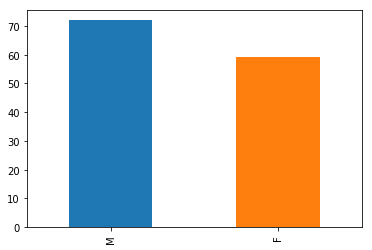

In [8]:
import matplotlib.pyplot as plt
df["ge"].value_counts().plot.bar()

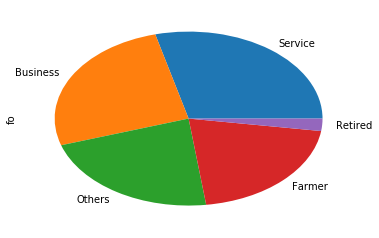

In [9]:
df["fo"].value_counts().plot.pie()

In [10]:
df['fs'].unique()

array(['Average', 'Small', 'Large'], dtype=object)

In [11]:

df=df.replace('Average',2)
df=df.replace('Small',1)
df=df.replace('Large',3)
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,3,Poor,Govt,Asm,1,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,1,Poor,Govt,Asm,2,2
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,2,2,Govt,Asm,3,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,3,Poor,Govt,Asm,2,2
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,3,Poor,Private,Asm,1,Good


In [12]:
df['fs'].unique()

array([2, 1, 3], dtype=int64)

In [13]:

df['tnp'].unique()

array(['Good', 'Vg', 'Pass', 'Best'], dtype=object)

In [14]:

df2 = df[['tnp','twp','esp','fmi','fs','nf','tt']]

In [15]:
df2.head()

,tnp,twp,esp,fmi,fs,nf,tt
0,Good,Good,Good,Medium,2,3,1
1,Vg,Vg,Vg,Low,2,1,2
2,Good,Good,Good,Am,2,2,3
3,Pass,Good,Good,Medium,1,3,2
4,Good,Good,Vg,Am,2,3,1


In [16]:
# Visualizing the essential attributes
df2.corr()

,fs,nf,tt
fs,1.000000,-0.122697,0.067865
nf,-0.122697,1.000000,-0.159186
tt,0.067865,-0.159186,1.000000


In [22]:

import seaborn as sns
feature_names = ['tnp', 'twp', 'fmi', 'fs','nf','tt']
X = df2[feature_names]
# end semester percentage
y = df2['esp']
df2.describe()

,fs,nf,tt
count,131.000000,131.000000,131.000000
mean,1.335878,2.213740,1.480916
std,0.505519,0.794284,0.636712
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,1.000000,2.000000,1.000000
75%,2.000000,3.000000,2.000000
max,3.000000,3.000000,3.000000


In [28]:
feature_names = ['tnp', 'twp', 'fmi', 'fs','nf','tt']
X = df2[feature_names]
# end semester percentage
y = df2['esp']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

ValueError: could not convert string to float: 'Medium'

In [29]:
pd.crosstab(df.fo,df.mo)
#gives the relationship between the fathers and the mothers.


mo,Business,Housewife,Others,Retired,Service
fo,,,,,
Business,1,29,0,0,4
Farmer,0,26,0,0,1
Others,0,26,2,0,1
Retired,0,1,0,1,1
Service,0,33,0,0,5


In [30]:
#inferences which can be drawn from this crosstab.
#maximum number of students whose father is in service and mother is a housewife.
#there is only one student having a business mother.
#all the students fathers are working.
#etc..

In [31]:
pd.crosstab(df.arr,df.atd) 
#gives the crosstabular relationship between the arrears and the attendance percentage of the students.

atd,2,Good,Poor
arr,,,
N,28,36,14
Y,19,20,14


In [32]:
#inference: most students with no arrears are having a good attendance percentage.

In [33]:
#challenges in using the data:
df.mo.plot(kind='box',vert=False)

#since none of the data is of numeric type ,they cannot be plotted as a bar,hist,etc

TypeError: Empty 'DataFrame': no numeric data to plot

In [34]:
df.tnp.unique() 
#there are 4 categories of performance by a student.(good,very good,best,pass)
#in order to calculate the end semester percentage, let us use this dataset

array(['Good', 'Vg', 'Pass', 'Best'], dtype=object)

In [36]:
dfd = df.copy()
#dfd = dfd.drop([ 'final_score'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)
# dataset train_test_split
from sklearn.cross_validation import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
len(list(X_train))

AttributeError: 'DataFrame' object has no attribute 'final_grade'